In [1]:
import pandas as pd
import numpy as np 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

from tensorflow.keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt

In [2]:
#Resize all the images 
IMAGE_SIZE=[224,224]

train_path='Datasets/train'
valid_path='Datasets/test'

In [3]:
#Next step----Adding preprocessing layer to resnet50
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)


94773248/94765736 [==============================] - 21s 0us/step


In [4]:
for layer in resnet.layers:
  layer.trainable=False
#Getting numbers of output classes
folders=glob('Datasets/train/*')
folders
len(folders)

3

In [5]:
x=Flatten()(resnet.output)

In [6]:
prediction=Dense(len(folders),activation='softmax')(x)

model=Model(inputs=resnet.input, outputs=prediction)

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

conv4_block6_1_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block6_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block6_1_relu (Activation (None, 14, 14, 256)  0           conv4_block6_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block6_2_conv (Conv2D)    (None, 14, 14, 256)  590080      conv4_block6_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block6_2_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block6_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block6_2_relu (Activation (None, 14, 14, 256)  0           conv4_block6_2_bn[0][0]          
__________________________________________________________________________________________________
conv4_bloc

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

In [9]:
#Use the image Generator to import images from dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

In [10]:
training_set=train_datagen.flow_from_directory('Datasets/train',
                                               target_size=(224,224),
                                               batch_size=32,
                                              class_mode='categorical')

Found 64 images belonging to 3 classes.


In [11]:
test_set=train_datagen.flow_from_directory('Datasets/test',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 58 images belonging to 3 classes.


In [13]:
r=model.fit(training_set,
           validation_data=test_set,
           epochs=50,
           steps_per_epoch=len(training_set),
           validation_steps=len(test_set))

Epoch 1/50
2/2 [==============================] - 23s 12s/step - loss: 3.6739 - accuracy: 0.4375 - val_loss: 3.0761 - val_accuracy: 0.1724
Epoch 2/50
2/2 [==============================] - 21s 11s/step - loss: 3.4793 - accuracy: 0.4688 - val_loss: 6.4385 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 23s 11s/step - loss: 4.7072 - accuracy: 0.3906 - val_loss: 1.1923 - val_accuracy: 0.5690
Epoch 4/50
2/2 [==============================] - 24s 12s/step - loss: 1.6385 - accuracy: 0.4531 - val_loss: 2.9823 - val_accuracy: 0.4655
Epoch 5/50
2/2 [==============================] - 21s 10s/step - loss: 2.7337 - accuracy: 0.5312 - val_loss: 2.9207 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 20s 10s/step - loss: 1.7711 - accuracy: 0.5156 - val_loss: 1.1701 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 22s 11s/step - loss: 1.3502 - accuracy: 0.5781 - val_loss: 2.1356 - val_accuracy: 0.3621
Epoch 8/50
2/2 [===========

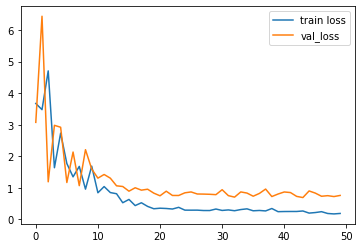

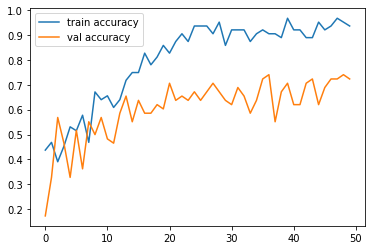

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()
plt.savefig('accuracyval_accuracy')


In [16]:
#Save it as h5 file
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [17]:
y_pred = model.predict(test_set)
y_pred

array([[1.29601583e-01, 7.40254939e-01, 1.30143523e-01],
       [2.49024369e-02, 7.06688941e-01, 2.68408686e-01],
       [7.07935262e-03, 8.28163922e-01, 1.64756760e-01],
       [6.70873821e-02, 8.88438702e-01, 4.44738902e-02],
       [8.14418867e-03, 9.89858806e-01, 1.99707784e-03],
       [8.91138554e-01, 8.54135826e-02, 2.34478060e-02],
       [3.44114713e-02, 8.52600455e-01, 1.12988152e-01],
       [1.88433714e-02, 7.78063953e-01, 2.03092575e-01],
       [5.92427075e-01, 3.53908986e-01, 5.36639690e-02],
       [1.16746075e-01, 8.15394878e-01, 6.78590089e-02],
       [9.01118517e-02, 4.24544699e-03, 9.05642688e-01],
       [1.01685718e-01, 1.17362648e-01, 7.80951679e-01],
       [6.39935583e-02, 6.04130328e-01, 3.31876129e-01],
       [8.27236950e-01, 4.17689830e-02, 1.30994096e-01],
       [1.33303716e-03, 9.49542165e-01, 4.91247624e-02],
       [1.12283751e-01, 7.77430236e-01, 1.10286094e-01],
       [1.09543437e-02, 9.05376732e-01, 8.36688429e-02],
       [8.96696094e-03, 8.48562

In [19]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0], dtype=int64)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_resnet50.h5')

In [22]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [23]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [24]:
x.shape
x=x/255  #because we rescale our data

In [25]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [26]:
model.predict(img_data)

array([[0.02040934, 0.002867  , 0.9767237 ]], dtype=float32)

In [27]:
a=np.argmax(model.predict(img_data), axis=1)

In [31]:
a==1

array([False])